In [2]:
# jt -t chesterish -T -N
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import torch.utils.data as D
import pandas as pd
import os
import albumentations as A
from torchvision import transforms as T

In [28]:
def ppr(x, nx): # просто форматированный вывод переменной
    print(nx + ': ' + str(x))

In [7]:
dataDir='annotations_trainval2014'
dataType='val2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
DATA_DIR = 'coco_dataset/'

In [4]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=5.98s)
creating index...
index created!


In [6]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
accessory appliance person food animal furniture outdoor indoor kitchen sports electronic vehicle


In [7]:
# get all images containing given categories, select one at random
#catIds = coco.getCatIds(catNms=['person','dog','skateboard'])
catIds = coco.getCatIds(catNms=['cat'])
imgIds = coco.getImgIds(catIds=catIds )
print(len(imgIds))
#imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

1480


params of picture: [{'license': 4, 'file_name': 'COCO_val2014_000000196664.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000196664.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-17 17:09:54', 'flickr_url': 'http://farm9.staticflickr.com/8264/8672132602_2183b02693_z.jpg', 'id': 196664}]
shape of picture: (480, 640, 3)


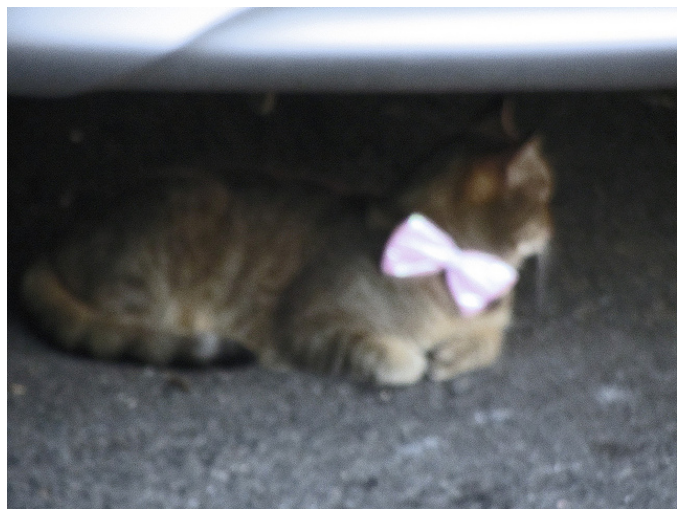

In [8]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#for idd in imgIds:
plt.figure(figsize=(12,12))
idd = imgIds[5]
img_descr = coco.loadImgs(idd)
img = coco.loadImgs(idd)[0]
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
print(f'params of picture: {img_descr}')
print(f'shape of picture: {I.shape}')

[{'segmentation': [[463.48, 96.0, 390.19, 141.42, 353.03, 177.55, 304.52, 170.32, 196.13, 147.61, 120.77, 146.58, 51.61, 168.26, 13.42, 225.03, 10.32, 276.65, 22.71, 311.74, 96.0, 337.55, 201.29, 347.87, 259.1, 342.71, 317.94, 354.06, 381.94, 363.35, 399.48, 347.87, 412.9, 361.29, 470.71, 337.55, 487.23, 269.42, 494.45, 241.55, 518.19, 231.23, 523.35, 205.42, 518.19, 184.77, 525.42, 169.29, 512.0, 135.23, 512.0, 121.81, 494.45, 121.81, 489.29, 111.48, 485.16, 85.68]], 'area': 94291.47754999998, 'iscrowd': 0, 'image_id': 196664, 'bbox': [10.32, 85.68, 515.1, 277.67], 'category_id': 17, 'id': 48522}]


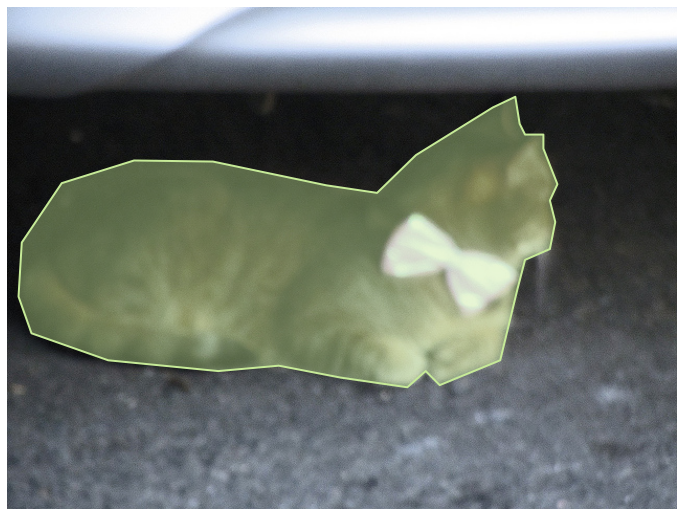

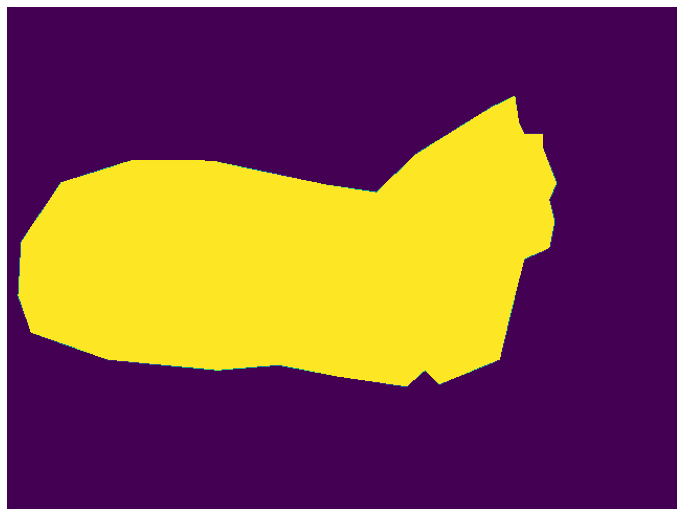

In [39]:
# load and display instance annotations
plt.figure(figsize=(12,12))
plt.imshow(I); plt.axis('off')
#annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)
mask = coco.annToMask(anns[0])
plt.figure(figsize=(12,12))
plt.imshow(mask)
plt.axis('off')
plt.show()

In [46]:
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!


An unhappy cat wearing a puffy pink beanie
The black and white cat is wearing a pink hat. 
A black and white cat with a pink hat on.
A tuxedo cat is wearing a pink knitted hat.
A black and white cat wearing a pink hat


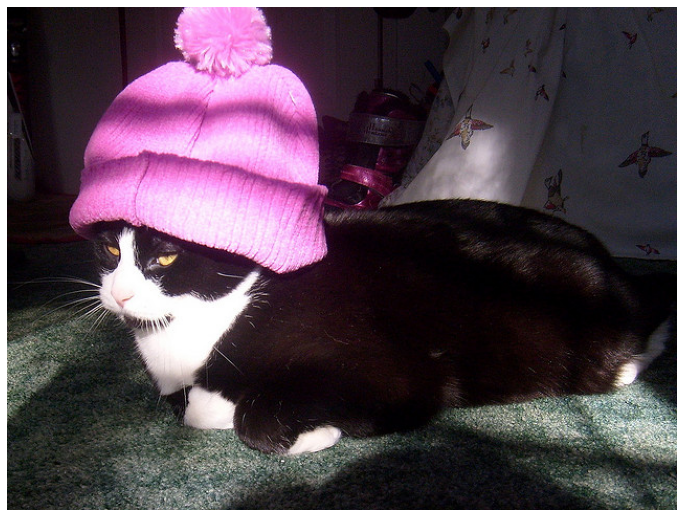

In [54]:
# load and display caption annotations
plt.figure(figsize=(12,12))
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

In [48]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [50]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [116]:
# code for mashine learning

catIds = coco.getCatIds(catNms=['cat'])  # отбор картинок с кошками (id категории)
imgIds = coco.getImgIds(catIds=catIds )  # отбор картинок с кошками (id картинок)
print(f'number of samples: {len(imgIds)}') # кол-во картинок с кошками

##### создай дирректорию !!!!!!!!!!!!!!!!!!!

DATA_DIR = 'coco_dataset/'

try:
    os.mkdir(DATA_DIR)
except FileExistsError:
    pass

for num_of_id in range(3):
    idd = imgIds[num_of_id]
    img = coco.loadImgs(idd)[0]
    I = io.imread(img['coco_url'])

    # added of mask
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    #coco.showAnns(anns)
    mask = coco.annToMask(anns[0])
    #plt.figure(figsize=(10,20)) ## ?????????
    #plt.subplot(121)
#     plt.axis('off')
#     plt.imshow(I)
    plt.imsave(DATA_DIR + f'img_{num_of_id}', I, format='jpg')
#     plt.title(f'shape of picture: {I.shape}, number: {num_of_id}')
    #plt.subplot(122)
    #plt.figure(figsize=(10,20))
    #mask = (mask + 1)%2
#     plt.figure()
#     plt.imshow(mask)
#     plt.axis('off')
    plt.imsave(DATA_DIR + f'mask_{num_of_id}', mask, format='jpg', cmap='Greys')
#     plt.title(f'shape of mask: {mask.shape}, number: {num_of_id}')

number of samples: 1480


In [28]:
def make_grid(shape, window=256, min_overlap=32):
    """
        Return Array of size (N,4), where N - number of tiles,
        2nd axis represente slices: x1,x2,y1,y2 
    """
    x, y = shape
    nx = x // (window - min_overlap) + 1
    x1 = np.linspace(0, x, num=nx, endpoint=False, dtype=np.int64)
    x1[-1] = x - window
    x2 = (x1 + window).clip(0, x)
    ny = y // (window - min_overlap) + 1
    y1 = np.linspace(0, y, num=ny, endpoint=False, dtype=np.int64)
    y1[-1] = y - window
    y2 = (y1 + window).clip(0, y)
    slices = np.zeros((nx,ny, 4), dtype=np.int64)
#     print(f'x1: {x1}')
#     print(f'x2: {x2}')
#     print(f'y1: {y1}')
#     print(f'y2: {y2}')
    
    for i in range(nx):
        for j in range(ny):
            slices[i,j] = x1[i], x2[i], y1[j], y2[j]    
    return slices.reshape(nx*ny,4)

In [115]:
class CoCoDataset(D.Dataset):

    def __init__(self, root_dir, transform,
                 window=256, overlap=32, threshold=0.25):  
        self.path = root_dir  # папка
        self.overlap = overlap  # перекрытие плиток
        self.window = window  # размер окна
        self.transform = transform   # трансформации изображения (как минимум изменение размеров)
        self.threshold = threshold  # для отбрасывания плиток без кошки
        self.build_slices()
        self.len = len(self.slices)
        self.as_tensor = T.Compose([
            T.ToTensor(),
            T.Normalize([0.625, 0.448, 0.688],
                        [0.131, 0.177, 0.101]),
        ])
    def build_slices(self):
        self.masks = [] # массив с масками. [id_of_image][h][w]
        self.slices = [] # массив со срезами [id_of_slice][4] (id_of_image,x1,x2,y1,y2)
        for num_of_id in range(3):
            mask = io.imread(self.path + f'mask_{num_of_id}')
            mask = mask[:,:,0]/255 # полная нормированная маска (числа [0, 1])
            self.masks.append(mask)

            slices = make_grid(mask.shape, window=self.window,
                                min_overlap=self.overlap) 
            for slc in slices:
                x1,x2,y1,y2 = slc
                if mask[x1:x2,y1:y2].sum() > self.threshold or True: #!!!!!!!!!!!!!!!!!!!!!!!!!
                    self.slices.append([num_of_id,x1,x2,y1,y2])
        #print(f'mask {self.masks[2][480][639]}')
        #print(f'slices: {self.slices[2][4]}')
                        
    # get data operation
    def __getitem__(self, index):
        
        # index - это индекс среза, то есть "номер плитки"!
        
        num_of_id = self.slices[index][0]
        x1,x2,y1,y2 = self.slices[index][1:]
        img = io.imread(self.path + f'img_{num_of_id}')
        image = img[x1:x2,y1:y2].copy()
        #print(f'image {image[426][383][2]}')
            #channels = [1, 2, 3] if dataset.count == 3 else [1, 1, 1]
            #image = dataset.read(channels,
                        #window=Window.from_slices((x1,x2),(y1,y2)))
            #image = np.moveaxis(image, 0, -1)
            
        mask = self.masks[num_of_id][x1:x2,y1:y2]
        
        augments = self.transform(image=image, mask=mask)
        return image, mask
        #return self.as_tensor(augments['image']), augments['mask'][None] #??????????????????
    
    def __len__(self):
        """
        Total number of samples in the dataset
        """
        return self.len
    
train = CoCoDataset(DATA_DIR, window=WINDOW, overlap=MIN_OVERLAP, transform=trfm)
img_in,mask_in = train[2]
print(len(train))
he = train.slices
for i in range(24):
    print(he[i])

84
[0, 0, 128, 0, 128]
[0, 0, 128, 106, 234]
[0, 0, 128, 213, 341]
[0, 0, 128, 320, 448]
[0, 0, 128, 426, 554]
[0, 0, 128, 512, 640]
[0, 106, 234, 0, 128]
[0, 106, 234, 106, 234]
[0, 106, 234, 213, 341]
[0, 106, 234, 320, 448]
[0, 106, 234, 426, 554]
[0, 106, 234, 512, 640]
[0, 213, 341, 0, 128]
[0, 213, 341, 106, 234]
[0, 213, 341, 213, 341]
[0, 213, 341, 320, 448]
[0, 213, 341, 426, 554]
[0, 213, 341, 512, 640]
[0, 299, 427, 0, 128]
[0, 299, 427, 106, 234]
[0, 299, 427, 213, 341]
[0, 299, 427, 320, 448]
[0, 299, 427, 426, 554]
[0, 299, 427, 512, 640]


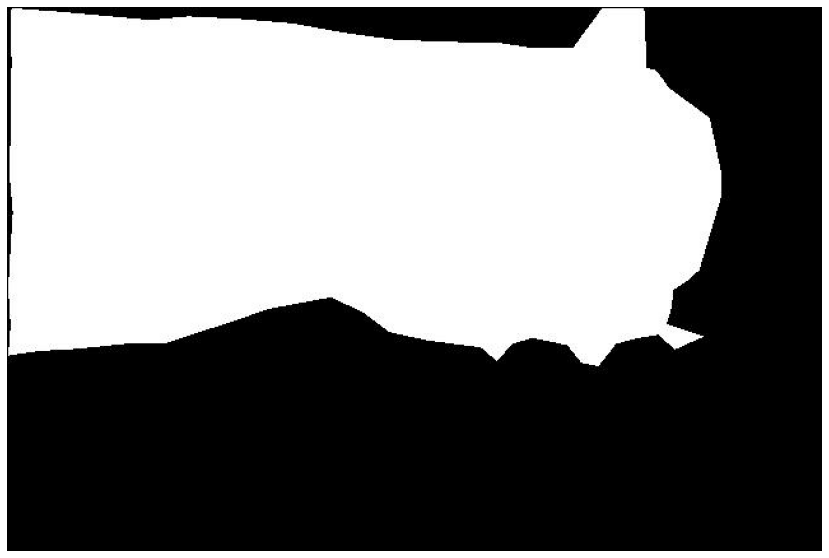

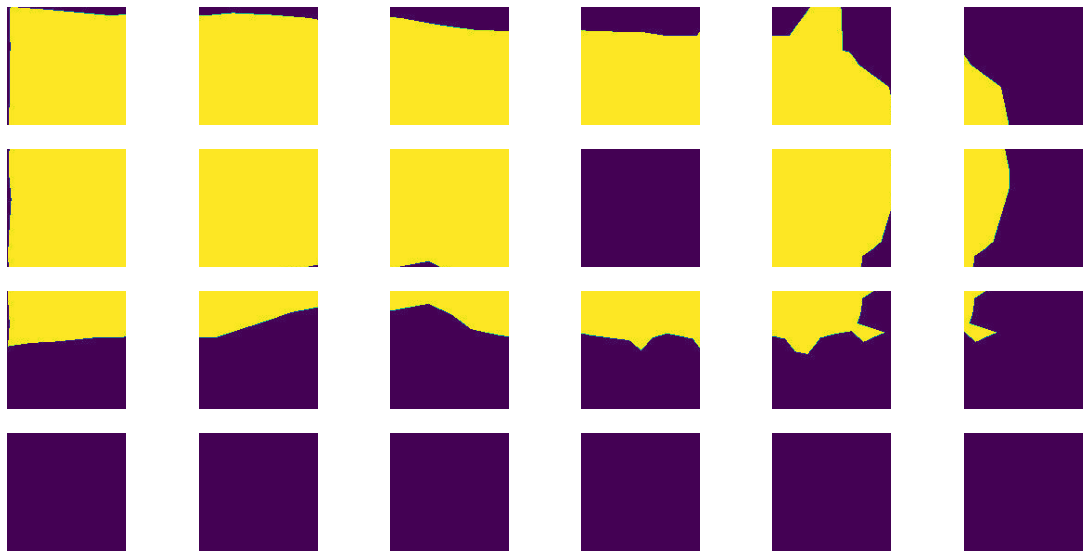

In [128]:
plt.figure(figsize=(20,10))
img_inst = io.imread(DATA_DIR + 'mask_0')
plt.imshow(img_inst)
plt.axis('off')
plt.show()
fig, ax = plt.subplots(4, 6, figsize=(20,10))
for k in range(24):
    img_in, mask_in = train[k]
    plt.subplot(4,6, k+1)
    plt.imshow(mask_in)
    plt.axis('off')

plt.show()
    
    
# plt.axis('off')
# plt.imshow(mask_in)
# plt.show()

In [69]:
WINDOW=128
MIN_OVERLAP=16
NEW_SIZE=256

trfm = A.Compose([
    A.Resize(NEW_SIZE,NEW_SIZE),
#     A.HorizontalFlip(p=0.5),
#     A.ColorJitter (brightness=0.07, contrast=0.07,
#                    saturation=0.1, hue=0.1, always_apply=False, p=0.3)
])

In [34]:
DATA_DIR = 'coco_dataset/'

print(train)

427
480
481


In [68]:
def make_grid(shape, window=256, min_overlap=32):
    """
        Return Array of size (N,4), where N - number of tiles,
        2nd axis represente slices: x1,x2,y1,y2 
    """
    x, y = shape
    nx = x // (window - min_overlap) + 1
    x1 = np.linspace(0, x, num=nx, endpoint=False, dtype=np.int64)
    x1[-1] = x - window
    x2 = (x1 + window).clip(0, x)
    ny = y // (window - min_overlap) + 1
    y1 = np.linspace(0, y, num=ny, endpoint=False, dtype=np.int64)
    y1[-1] = y - window
    y2 = (y1 + window).clip(0, y)
    slices = np.zeros((nx,ny, 4), dtype=np.int64)
#     print(f'x1: {x1}')
#     print(f'x2: {x2}')
#     print(f'y1: {y1}')
#     print(f'y2: {y2}')
    
    for i in range(nx):
        for j in range(ny):
            slices[i,j] = x1[i], x2[i], y1[j], y2[j]    
    return slices.reshape(nx*ny,4)

class BUIL():
    
       def __init__(self, root_dir, transform,
                 window=128, overlap=16, threshold=0.25):  
        self.path = root_dir  # папка
        self.overlap = overlap  # перекрытие плиток
        self.window = window  # размер окна
        self.transform = transform   # трансформации изображения (как минимум изменение размеров)
        self.threshold = threshold  # для отбрасывания плиток без кошки
        self.build_slices()
        self.len = len(self.slices)
        self.as_tensor = T.Compose([
            T.ToTensor(),
            T.Normalize([0.625, 0.448, 0.688],
                        [0.131, 0.177, 0.101]),
        ])

    def build_slices(self):
        self.masks = [] # массив с масками. [id_of_image][h][w]
        self.slices = [] # массив со срезами [id_of_slice][4] (id_of_image,x1,x2,y1,y2)
        for num_of_id in range(3):
            mask = io.imread(root_dir + f'mask_{num_of_id}')
            mask = mask[:,:,0]/255
            self.masks.append(mask)

            slices = make_grid(mask.shape, window=self.window,
                                min_overlap=self.overlap)
            ppr(slices,'slices')
            for slc in slices:
                x1,x2,y1,y2 = slc
                if mask[x1:x2,y1:y2].sum() > self.threshold or True: #!!!!!!!!!!!!!!!!!!!!!!!!!
                    self.slices.append([num_of_id,x1,x2,y1,y2])
                    
bil = BUIL(DATA_DIR, window=WINDOW, overlap=MIN_OVERLAP, transform=trfm)